In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
housing = pd.read_csv('../../Data/Property_Assessment_Data__Current_Calendar_Year_.csv')

C:\Users\HP\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
housing.head()

,Account Number,Suite,House Number,Street Name,Assessed Value,Assessment Class,Neighbourhood ID,Neighbourhood,Ward,Garage,Latitude,Longitude
0,10202374,NaN,455.0,MCCONACHIE WAY NW,381500,Residential,2521.0,MCCONACHIE AREA,Ward 3,Y,53.630842,-113.428512
1,9969312,NaN,15519.0,103 STREET NW,463500,Residential,3040.0,BEAUMARIS,Ward 2,Y,53.616836,-113.500368
2,10030551,11,1780.0,GLASTONBURY BOULEVARD NW,271000,Residential,4720.0,GLASTONBURY,Ward 1,N,53.501531,-113.672511
3,1263045,306,14916.0,26 STREET NW,69500,Residential,2280.0,FRASER,Ward 4,N,53.611973,-113.379481
4,10176917,NaN,16923.0,71 STREET NW,553500,Residential,2700.0,SCHONSEE,Ward 3,Y,53.630884,-113.450859


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 12 columns):
Account Number      400916 non-null int64
Suite               79397 non-null object
House Number        358129 non-null float64
Street Name         358129 non-null object
Assessed Value      400916 non-null int64
Assessment Class    400916 non-null object
Neighbourhood ID    400915 non-null float64
Neighbourhood       400915 non-null object
Ward                400915 non-null object
Garage              400916 non-null object
Latitude            400916 non-null float64
Longitude           400916 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 36.7+ MB


In [5]:
housing.describe()

,Account Number,House Number,Assessed Value,Neighbourhood ID,Latitude,Longitude
count,4.009160e+05,358129.000000,4.009160e+05,400915.000000,400916.000000,400916.000000
mean,7.644161e+06,7801.138076,4.656803e+05,4248.527728,53.520081,-113.511479
std,3.267638e+06,5379.167705,3.683814e+06,1765.560855,0.067231,0.081662
min,1.001007e+06,1.000000,0.000000e+00,1010.000000,53.338595,-113.713318
25%,4.243998e+06,2729.000000,1.770000e+05,2600.000000,53.461483,-113.566806
50%,9.940570e+06,8307.000000,3.235000e+05,4500.000000,53.521727,-113.509553
75%,1.013153e+07,11450.000000,4.260000e+05,5576.000000,53.573809,-113.448291
max,1.094012e+07,51175.000000,1.338810e+09,8888.000000,53.715149,-113.278435


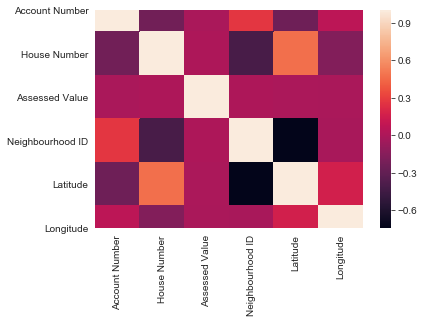

In [6]:
sns.heatmap(housing.corr())

Notice that all of the columns used in this heat map are either unique to each and every house or are so common that no significant difference can be obtained. The latitude and longitude should be extremely good at predicting, but since all coords are in Edmonton the difference between them is insignificant

In [7]:
houseX = housing.drop('Assessed Value', axis=1)

In [8]:
houseY = housing['Assessed Value']

In [9]:
houseX.head()

,Account Number,Suite,House Number,Street Name,Assessment Class,Neighbourhood ID,Neighbourhood,Ward,Garage,Latitude,Longitude
0,10202374,NaN,455.0,MCCONACHIE WAY NW,Residential,2521.0,MCCONACHIE AREA,Ward 3,Y,53.630842,-113.428512
1,9969312,NaN,15519.0,103 STREET NW,Residential,3040.0,BEAUMARIS,Ward 2,Y,53.616836,-113.500368
2,10030551,11,1780.0,GLASTONBURY BOULEVARD NW,Residential,4720.0,GLASTONBURY,Ward 1,N,53.501531,-113.672511
3,1263045,306,14916.0,26 STREET NW,Residential,2280.0,FRASER,Ward 4,N,53.611973,-113.379481
4,10176917,NaN,16923.0,71 STREET NW,Residential,2700.0,SCHONSEE,Ward 3,Y,53.630884,-113.450859


In [10]:
houseX.nunique()

Account Number      400916
Suite                 2245
House Number         18443
Street Name           2845
Assessment Class         4
Neighbourhood ID       398
Neighbourhood          398
Ward                    12
Garage                   2
Latitude            255907
Longitude           237600
dtype: int64

Let's quickly take a look at the percentages of null values for each column

In [11]:
houseX.isna().sum()/len(houseX)

Account Number      0.000000
Suite               0.801961
House Number        0.106723
Street Name         0.106723
Assessment Class    0.000000
Neighbourhood ID    0.000002
Neighbourhood       0.000002
Ward                0.000002
Garage              0.000000
Latitude            0.000000
Longitude           0.000000
dtype: float64

Since there is a unique account number for every row, we will drop that part as well.

In [12]:
houseX.drop('Account Number', axis=1, inplace=True)

Suite has a null rate of 80%! Chances are that null values are just houses or stand-alone units, so it is possible that field could have value to it. We will see if we can find a value that does not exist in the 'Suite' column, and initialize all null values to that.

In [13]:
len(houseX[houseX['Suite'] == 000])

0

In [14]:
houseX[houseX['Suite'].isna()]['Suite'] = 000

C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
houseX['Suite'].value_counts()

201     1031
202      989
101      968
203      965
301      952
        ... 
918        1
77P        1
212P       1
915        1
129P       1
Name: Suite, Length: 2245, dtype: int64

Let's take a look at those house #s and street names, as their percentages are exactly the same.

In [16]:
np.logical_xor(houseX['House Number'].isna(), houseX['Street Name'].isna()).sum()

0

In [17]:
np.logical_and(houseX['House Number'].isna(), houseX['Street Name'].isna()).sum()

42787

In [18]:
houseX['House Number'].isna().sum()

42787

In [19]:
42787 / len(houseX)

0.10672310409163016

So every element with a missing house # has a missing street #, and vice versa. Are any of their assessment classes?

In [20]:
np.logical_and(houseX['Assessment Class'] == 'Residential', houseX['Street Name'].isna()).sum()

40605

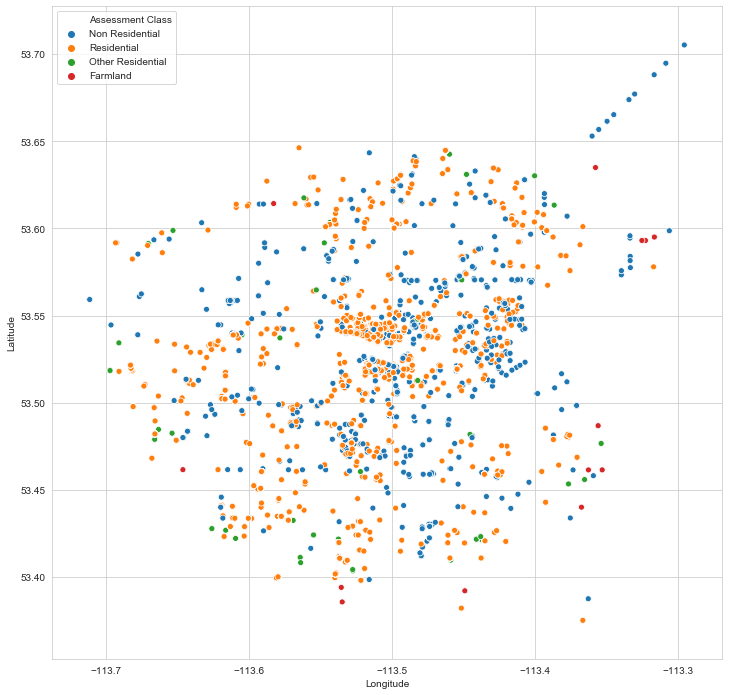

In [21]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', hue='Assessment Class', data=houseX[(houseX['Street Name'].isna())])

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', data=houseX)

In [ ]:
houseX.columns

In [ ]:
houseX.nunique()

Now, we will categorize the data based on a few different attributes: Assessment Class, Ward, Garage.

In [ ]:
for hue in ['Assessment Class', 'Ward', 'Garage']:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x='Longitude', y='Latitude', hue=hue, data=houseX)
    plt.title('Longitude vs. Latitude: Hue = ' + hue)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

### Wait, what is that in the middle of Terwillegar Park?

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', 
                data=houseX[((-113.59 > houseX['Longitude']) & (houseX['Longitude'] > -113.64)) & ((53.50 > houseX['Latitude']) & (houseX['Latitude'] > 53.46))])

Seems to be some sort of house...

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='Longitude', y='Latitude', hue='Garage',
                data=houseX[((-113.59 > houseX['Longitude']) & (houseX['Longitude'] > -113.64)) & ((53.50 > houseX['Latitude']) & (houseX['Latitude'] > 53.46))])

It doesn't have a garage though.

If anyone isn't from Edmonton, this is what Terwillegar Park looks like:

![Image of Terwillegar Park](https://i.pinimg.com/736x/de/5f/d5/de5fd5ddbf576912a1fba6249f7d30ec.jpg)

I've been here plenty of times, and I've never seen a house or any type of building in this park.

Let's take a look at that piece of data specifically.

In [ ]:
houseX[((-113.61 > houseX['Longitude']) & (houseX['Longitude'] > -113.625)) & ((53.485 > houseX['Latitude']) & (houseX['Latitude'] > 53.48))]

Looking the house up on google maps...

In [ ]:
from IPython.display import Image
Image(filename='../../../Images/TerwillegarParkGoogleMaps.jpg') 

It seems to be the park itself. On further inspection, it makes sense, as the dataset is for 'properties', not 'houses'

For the sake of interest, what is the value of Terwillegar Park?

In [ ]:
housing[((-113.61 > housing['Longitude']) & (housing['Longitude'] > -113.625)) & ((53.485 > housing['Latitude']) & (housing['Latitude'] > 53.48))]

If anyone has a spare 4 million lying around, you could purchase Terwillegar Park!

## Data Augmentation
### Game Plan
There's not a whole lot of unique information about the houses themselves in the data, so let's see what we can create!

In [ ]:
houseX.columns

We would think that Latitude and Longitude would directly imply Ward, but let's see if this is really true.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(houseX[['Latitude', 'Longitude']], houseX['Ward'], test_size=0.33, random_state=420)

In [ ]:
houseX[houseX['Ward'].isnull()]

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train)

In [ ]:
predictions = lin.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve